In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import tensorflow as tf
from tensorflow import keras

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.models import Model, load_model
import keras.backend as K

import model as tcav_model
import tcav as tcav
import utils as utils
import activation_generator as act_gen
import tensorflow as tf
import utils_plot as utils_plot


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import numpy as np
from numpy.linalg import norm
import pandas as pd

import pickle
#from bunch import bunchify

import cav as cav

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image

import os
import math

import PIL.Image
from sklearn.metrics import pairwise
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import preprocess_input



Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
model = load_model('v3_model.h5')

/Users/tyler/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'
working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav_on_azure'


label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

In [471]:
columns = ['target_class','layer','concept_p','concept_n','split_seed','orig_score']
df = pd.DataFrame(columns = columns)
#pickle.dump(df,open('df_random.pkl', 'wb'))

In [ ]:
## Orig // SVM

In [478]:
things_to_run_random = []
# target_class, target_class_name, concept_p, layer

things_to_run_random.append(['lots_of_lions','lion','mixed10'])
things_to_run_random.append(['lots_of_lions','lion','mixed9'])
things_to_run_random.append(['lots_of_lions','lion','mixed8'])
things_to_run_random.append(['lots_of_lions','lion','mixed6'])
things_to_run_random.append(['lots_of_lions','lion','mixed4'])

things_to_run_random.append(['lots_of_zebras','zebra','mixed10'])
things_to_run_random.append(['lots_of_zebras','zebra','mixed9'])
things_to_run_random.append(['lots_of_zebras','zebra','mixed8'])
things_to_run_random.append(['lots_of_zebras','zebra','mixed6'])
things_to_run_random.append(['lots_of_zebras','zebra','mixed4'])

things_to_run_random.append(['cab','cab','mixed10'])
things_to_run_random.append(['cab','cab','mixed9'])
things_to_run_random.append(['cab','cab','mixed8'])
things_to_run_random.append(['cab','cab','mixed6'])
things_to_run_random.append(['cab','cab','mixed4'])

things_to_run_random.append(['aircraft_carrier','aircraft_carrier','mixed10'])
things_to_run_random.append(['aircraft_carrier','aircraft_carrier','mixed9'])
things_to_run_random.append(['aircraft_carrier','aircraft_carrier','mixed8'])
things_to_run_random.append(['aircraft_carrier','aircraft_carrier','mixed6'])
things_to_run_random.append(['aircraft_carrier','aircraft_carrier','mixed4'])

num_random = 10

for target_class, target_class_name, layer in things_to_run_random:
    df = pickle.load(open('df_random.pkl', 'rb'))
    for class_idx in range(num_random):
        split_seed = class_idx
        concept_n = 'random500_' + str(class_idx)
        concept_p = 'random500_' + str(class_idx+20)
        #concept_n = 'N_' + str(class_idx)
        subset = df[(df['target_class']==target_class) & 
                (df['layer']==layer) & 
                (df['concept_p']==concept_p) &
                (df['concept_n']==concept_n) &
                (df['split_seed']==split_seed)]
        if len(subset) == 0:
            print(f'running {target_class}, {layer}, {concept_p}, {concept_n}')

            acts_p,_ = get_acts_for_concept(concept_p,layer)
            acts_n,_ = get_acts_for_concept(concept_n,layer)
            _,acts_class = get_acts_for_concept(target_class,layer)

            x = np.concatenate((acts_p,acts_n))
            #y = np.concatenate((np.zeros(50),np.ones(500)))
            y = np.concatenate((np.zeros(50),np.ones(50)))

            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)

            cav_params = make_orig_cav(x_train,y_train)
            orig_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

            #cav_params = make_SVM_cav(x_train,y_train,.1)
            #svm_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

            this_dict = {'target_class':target_class,
                         'layer':layer,
                         'split_seed':split_seed,
                         'concept_p':concept_p,
                         'concept_n':concept_n,
                         'orig_score':orig_score,}
                         #'svm_score':svm_score,}
            df = df.append([this_dict])
        else:
            print(f'already in df {target_class}, {layer}, {concept_p}, {concept_n}')

    pickle.dump(df,open('df_random.pkl', 'wb'))
    print('### did write ###')
pickle.dump(things_to_run,open('tmp.pkl','wb'))


already in df lots_of_lions, mixed10, random500_20, random500_0
already in df lots_of_lions, mixed10, random500_21, random500_1
already in df lots_of_lions, mixed10, random500_22, random500_2
already in df lots_of_lions, mixed10, random500_23, random500_3
already in df lots_of_lions, mixed10, random500_24, random500_4
already in df lots_of_lions, mixed10, random500_25, random500_5
already in df lots_of_lions, mixed10, random500_26, random500_6
already in df lots_of_lions, mixed10, random500_27, random500_7
already in df lots_of_lions, mixed10, random500_28, random500_8
already in df lots_of_lions, mixed10, random500_29, random500_9
### did write ###
already in df lots_of_lions, mixed9, random500_20, random500_0
already in df lots_of_lions, mixed9, random500_21, random500_1
already in df lots_of_lions, mixed9, random500_22, random500_2
already in df lots_of_lions, mixed9, random500_23, random500_3
already in df lots_of_lions, mixed9, random500_24, random500_4
already in df lots_of_lions

already in df cab, mixed4, random500_29, random500_9
### did write ###
running aircraft_carrier, mixed10, random500_20, random500_0
running aircraft_carrier, mixed10, random500_21, random500_1
running aircraft_carrier, mixed10, random500_22, random500_2
running aircraft_carrier, mixed10, random500_23, random500_3
running aircraft_carrier, mixed10, random500_24, random500_4
running aircraft_carrier, mixed10, random500_25, random500_5
running aircraft_carrier, mixed10, random500_26, random500_6
running aircraft_carrier, mixed10, random500_27, random500_7
running aircraft_carrier, mixed10, random500_28, random500_8
running aircraft_carrier, mixed10, random500_29, random500_9
### did write ###
running aircraft_carrier, mixed9, random500_20, random500_0
running aircraft_carrier, mixed9, random500_21, random500_1
running aircraft_carrier, mixed9, random500_22, random500_2
running aircraft_carrier, mixed9, random500_23, random500_3
running aircraft_carrier, mixed9, random500_24, random500_4
r

## Orig // SVM

In [410]:
things_to_run = []
# target_class, target_class_name, concept_p, layer


things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed9'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed9'])

things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed9'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed9'])

num_random = 5

split_seed_list = [1,2,3,4,5]

for target_class, target_class_name, concept_p, layer in things_to_run:
    df = pickle.load(open('df_orig_svm.pkl', 'rb'))
    #df = pickle.load(open('df_5x5_500.pkl', 'rb'))
    for class_idx in range(num_random):
        for split_seed in split_seed_list:
        #split_seed = class_idx
            concept_n = 'random500_' + str(class_idx)
            #concept_n = 'N_' + str(class_idx)
            subset = df[(df['target_class']==target_class) & 
                    (df['layer']==layer) & 
                    (df['concept_p']==concept_p) &
                    (df['concept_n']==concept_n) &
                    (df['split_seed']==split_seed)]
            if len(subset) == 0:
                print(f'running {target_class}, {layer}, {concept_p}, {concept_n}')

                acts_p,_ = get_acts_for_concept(concept_p,layer)
                acts_n,_ = get_acts_for_concept(concept_n,layer)
                _,acts_class = get_acts_for_concept(target_class,layer)

                x = np.concatenate((acts_p,acts_n))
                #y = np.concatenate((np.zeros(50),np.ones(500)))
                y = np.concatenate((np.zeros(50),np.ones(50)))

                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)

                cav_params = make_orig_cav(x_train,y_train)
                orig_score = comp_tcav(target_class_name,cav_params,acts_class,layer)
                
                cav_params = make_SVM_cav(x_train,y_train,.1)
                svm_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                this_dict = {'target_class':target_class,
                             'layer':layer,
                             'split_seed':split_seed,
                             'concept_p':concept_p,
                             'concept_n':concept_n,
                             'orig_score':orig_score,
                             'svm_score':svm_score,}
                df = df.append([this_dict])
            else:
                print(f'already in df {target_class}, {layer}, {concept_p}, {concept_n}')

    pickle.dump(df,open('df_orig_svm.pkl', 'wb'))
    print('### did write ###')
pickle.dump(things_to_run,open('tmp.pkl','wb'))


running lots_of_lions, mixed9, ocean_sub_1, random500_0
running lots_of_lions, mixed9, ocean_sub_1, random500_0
running lots_of_lions, mixed9, ocean_sub_1, random500_0
running lots_of_lions, mixed9, ocean_sub_1, random500_0
running lots_of_lions, mixed9, ocean_sub_1, random500_0
running lots_of_lions, mixed9, ocean_sub_1, random500_1
running lots_of_lions, mixed9, ocean_sub_1, random500_1
running lots_of_lions, mixed9, ocean_sub_1, random500_1
running lots_of_lions, mixed9, ocean_sub_1, random500_1
running lots_of_lions, mixed9, ocean_sub_1, random500_1
running lots_of_lions, mixed9, ocean_sub_1, random500_2
running lots_of_lions, mixed9, ocean_sub_1, random500_2
running lots_of_lions, mixed9, ocean_sub_1, random500_2
running lots_of_lions, mixed9, ocean_sub_1, random500_2
running lots_of_lions, mixed9, ocean_sub_1, random500_2
running lots_of_lions, mixed9, ocean_sub_1, random500_3
running lots_of_lions, mixed9, ocean_sub_1, random500_3
running lots_of_lions, mixed9, ocean_sub_1, rand

In [417]:
things_to_run = []
# target_class, target_class_name, concept_p, layer



things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed10'])
things_to_run.append(['cab','cab','yellow_sub_1','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed10'])

things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed4'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed6'])

things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed4'])
things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed4'])

things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed8'])
things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed10'])

things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed10'])
things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed8'])

things_to_run.append(['lots_of_lions','lion','random500_20','mixed10'])
#things_to_run.append(['lots_of_lions','lion','random500_20','mixed8'])

things_to_run.append(['lots_of_lions','lion','random500_21','mixed10'])
#things_to_run.append(['lots_of_lions','lion','random500_20','mixed8'])

things_to_run.append(['lots_of_zebras','zebra','random500_20','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','random500_21','mixed10'])

things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed6'])
things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed4'])

things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed9'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed9'])

things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed9'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed9'])

things_to_run.append(['lots_of_zebras','zebra','random500_20','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_21','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_22','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_23','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_24','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_25','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_26','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_27','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_28','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','random500_29','mixed6'])

things_to_run.append(['lots_of_zebras','zebra','random500_20','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','random500_21','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','random500_22','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','random500_23','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','random500_24','mixed10'])

things_to_run.append(['lots_of_lions','lion','random500_20','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_21','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_22','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_23','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_24','mixed10'])

things_to_run.append(['lots_of_lions','lion','random500_20','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_21','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_22','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_23','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_24','mixed9'])

num_random = 1

split_seed_list = [1]

for target_class, target_class_name, concept_p, layer in things_to_run:
    df = pickle.load(open('df_5x5.pkl', 'rb'))
    #df = pickle.load(open('df_5x5_500.pkl', 'rb'))
    for class_idx in range(num_random):
        for split_seed in split_seed_list:
        #split_seed = class_idx
            concept_n = 'random500_' + str(class_idx)
            #concept_n = 'N_' + str(class_idx)
            subset = df[(df['target_class']==target_class) & 
                    (df['layer']==layer) & 
                    (df['concept_p']==concept_p) &
                    (df['concept_n']==concept_n) &
                    (df['split_seed']==split_seed)]
            if len(subset) == 0:
                print(f'running {target_class}, {layer}, {concept_p}, {concept_n}')

                acts_p,_ = get_acts_for_concept(concept_p,layer)
                acts_n,_ = get_acts_for_concept(concept_n,layer)
                _,acts_class = get_acts_for_concept(target_class,layer)

                x = np.concatenate((acts_p,acts_n))
                #y = np.concatenate((np.zeros(50),np.ones(500)))
                y = np.concatenate((np.zeros(50),np.ones(50)))

                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)

                #cav_1 = make_orig_cav(x_train,y_train)
                #score_1 = comp_tcav(target_class_name,cav_1,acts_class,layer)

                cav_2_seeds = np.empty((100,size_dict[layer]))
                for seed in range(100):
                    cav_2_seeds[seed] = make_orig_cav_seed(x_train,y_train,seed)
                cav_2 = cav_2_seeds.mean(axis=0)
                marg_score = comp_tcav(target_class_name,cav_2,acts_class,layer)

                x_train_p_list,x_train_n_list =[],[]
                for idx,a in enumerate(x_train):
                    if y_train[idx] == 1:
                        x_train_p_list.append(a)
                    else:
                        x_train_n_list.append(a)

                x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

                mu_p = (x_train_p).mean(axis=0)
                mu_n = (x_train_n).mean(axis=0)
                cav_params = mu_n - mu_p
                mean_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                cav_params = make_log_cav(x_train,y_train)
                log_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                this_dict = {'target_class':target_class,
                             'layer':layer,
                             'split_seed':split_seed,
                             'concept_p':concept_p,
                             'concept_n':concept_n,
                             'marg_score':marg_score,
                             'mean_score':mean_score,
                             'log_score':log_score}
                df = df.append([this_dict])
            else:
                print(f'already in df {target_class}, {layer}, {concept_p}, {concept_n}')

    pickle.dump(df,open('df_5x5.pkl', 'wb'))
    print('### did write ###')
pickle.dump(things_to_run,open('tmp.pkl','wb'))


already in df lots_of_lions, mixed10, grassland_sub_1, random500_0
### did write ###
already in df cab, mixed10, yellow_sub_1, random500_0
### did write ###
already in df lots_of_zebras, mixed10, striped_sub_1, random500_0
### did write ###
already in df lots_of_lions, mixed4, grassland_sub_1, random500_0
### did write ###
already in df lots_of_lions, mixed6, grassland_sub_1, random500_0
### did write ###
already in df lots_of_zebras, mixed4, striped_sub_1, random500_0
### did write ###
already in df lots_of_zebras, mixed4, dotted_sub_1, random500_0
### did write ###
already in df lots_of_zebras, mixed8, dotted_sub_1, random500_0
### did write ###
already in df lots_of_zebras, mixed10, dotted_sub_1, random500_0
### did write ###
already in df lots_of_lions, mixed10, ocean_sub_1, random500_0
### did write ###
already in df lots_of_lions, mixed8, ocean_sub_1, random500_0
### did write ###
already in df lots_of_lions, mixed10, random500_20, random500_0
### did write ###
already in df lots

In [383]:
#model.get_layer(name='mixed9_0')

In [381]:
#model.summary()

In [368]:
# 50
source_dir = working_dir + '/concepts/'
bn_names = ['mixed0','mixed1','mixed2','mixed3','mixed4','mixed5','mixed6','mixed7','mixed8','mixed9']#,'mixed10']

things_to_run = []
# target_class, target_class_name, concept_p, layer


things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed10'])
things_to_run.append(['noise_color_150','zebra','striped_sub_1','mixed10'])
things_to_run.append(['cab','cab','yellow_50','mixed10'])
things_to_run.append(['cab','cab','yellow_sub_1','mixed10'])
things_to_run.append(['cab','cab','yellow_sub_3','mixed10'])

things_to_run.append(['lots_of_zebras','zebra','grassland_sub_1','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','ocean_sub_1','mixed10'])

things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed10'])
things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed10'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_3','mixed10'])

things_to_run.append(['cab','cab','road_sub_1','mixed10'])
things_to_run.append(['cab','cab','grassland_sub_1','mixed10'])

things_to_run.append(['ping_pong_ball','ping-pong_ball','white_sub_1','mixed10'])
things_to_run.append(['ping_pong_ball','ping-pong_ball','japanese_sub_1','mixed10'])
things_to_run.append(['ping_pong_ball','ping-pong_ball','ball_sub_1','mixed10'])


num_random = 2

split_seed_list = [1,2,3,4,5]
lambda_ = -.01

for target_class, target_class_name, concept_p, layer in things_to_run:
    df = pickle.load(open('df_lambda_param.pkl', 'rb'))
    #df = pickle.load(open('df_8.pkl', 'rb'))
    #df = pickle.load(open('df_5x5_500.pkl', 'rb'))
    for class_idx in range(num_random):
        for split_seed in split_seed_list:
        #split_seed = class_idx
            #concept_n = 'random500_' + str(class_idx)
            concept_n = 'N_' + str(class_idx)
            subset = df[(df['target_class']==target_class) & 
                    (df['layer']==layer) & 
                    (df['concept_p']==concept_p) &
                    (df['concept_n']==concept_n) &
                    (df['split_seed']==split_seed)]
            if len(subset) == 0:
                print(f'running {target_class}, {layer}, {concept_p}, {concept_n}')

                acts_p,_ = get_acts_for_concept(concept_p,layer)
                acts_n,_ = get_acts_for_concept(concept_n,layer)
                _,acts_class = get_acts_for_concept(target_class,layer)

                x = np.concatenate((acts_p,acts_n))
                y = np.concatenate((np.zeros(50),np.ones(500)))
                #y = np.concatenate((np.zeros(500),np.ones(500)))

                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)

                #cav_1 = make_orig_cav(x_train,y_train)
                #orig_score = comp_tcav(target_class_name,cav_1,acts_class,layer)

                #cav_2_seeds = np.empty((100,size_dict[layer]))
                #for seed in range(100):
                #    cav_2_seeds[seed] = make_orig_cav_seed(x_train,y_train,seed)
                #cav_2 = cav_2_seeds.mean(axis=0)
                #marg_score = comp_tcav(target_class_name,cav_2,acts_class,layer)

                x_train_p_list,x_train_n_list =[],[]
                for idx,a in enumerate(x_train):
                    if y_train[idx] == 0:
                        x_train_p_list.append(a)
                    else:
                        x_train_n_list.append(a)

                x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

                mu_p = (x_train_p).mean(axis=0)
                #mu_p = np.median(x_train_p,axis=0)
                mu_n = (x_train_n).mean(axis=0)
                #mu_n = np.median(x_train_n,axis=0)
                cav_params = mu_p - mu_n
                mean_score_0 = comp_tcav_lamb(target_class_name,cav_params,acts_class,layer,0)
                mean_score_01 = comp_tcav_lamb(target_class_name,cav_params,acts_class,layer,-.01)
                mean_score_05 = comp_tcav_lamb(target_class_name,cav_params,acts_class,layer,-.05)

                cav_params = make_log_cav(x_train,y_train)
                log_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                this_dict = {'target_class':target_class,
                             'layer':layer,
                             'split_seed':split_seed,
                             'concept_p':concept_p,
                             'concept_n':concept_n,
                             #'orig_score':orig_score,
                             #'marg_score':marg_score,
                             'log_score':log_score,
                             'mean_score_0':mean_score_0,
                             'mean_score_01':mean_score_01,
                             'mean_score_05':mean_score_05,
                             }
                df = df.append([this_dict])
            else:
                print(f'already in df {target_class}, {layer}, {concept_p}, {concept_n}')

    pickle.dump(df,open('df_lambda_param.pkl', 'wb'))
    print('### did write ###')
#pickle.dump(things_to_run,open('to_run_8.pkl','wb'))


already in df lots_of_zebras, mixed10, dotted_sub_1, N_0
already in df lots_of_zebras, mixed10, dotted_sub_1, N_0
already in df lots_of_zebras, mixed10, dotted_sub_1, N_0
already in df lots_of_zebras, mixed10, dotted_sub_1, N_0
already in df lots_of_zebras, mixed10, dotted_sub_1, N_0
already in df lots_of_zebras, mixed10, dotted_sub_1, N_1
already in df lots_of_zebras, mixed10, dotted_sub_1, N_1
already in df lots_of_zebras, mixed10, dotted_sub_1, N_1
already in df lots_of_zebras, mixed10, dotted_sub_1, N_1
already in df lots_of_zebras, mixed10, dotted_sub_1, N_1
### did write ###
already in df lots_of_zebras, mixed10, striped_sub_1, N_0
already in df lots_of_zebras, mixed10, striped_sub_1, N_0
already in df lots_of_zebras, mixed10, striped_sub_1, N_0
already in df lots_of_zebras, mixed10, striped_sub_1, N_0
already in df lots_of_zebras, mixed10, striped_sub_1, N_0
already in df lots_of_zebras, mixed10, striped_sub_1, N_1
already in df lots_of_zebras, mixed10, striped_sub_1, N_1
alread

### did write ###
already in df ping_pong_ball, mixed10, ball_sub_1, N_0
already in df ping_pong_ball, mixed10, ball_sub_1, N_0
already in df ping_pong_ball, mixed10, ball_sub_1, N_0
already in df ping_pong_ball, mixed10, ball_sub_1, N_0
already in df ping_pong_ball, mixed10, ball_sub_1, N_0
already in df ping_pong_ball, mixed10, ball_sub_1, N_1
already in df ping_pong_ball, mixed10, ball_sub_1, N_1
already in df ping_pong_ball, mixed10, ball_sub_1, N_1
already in df ping_pong_ball, mixed10, ball_sub_1, N_1
already in df ping_pong_ball, mixed10, ball_sub_1, N_1
### did write ###


In [369]:
pickle.dump(things_to_run,open('to_run_lambda_2.pkl','wb'))

In [840]:
#df1 = df.reset_index()
#df1.drop(index=range(35,56),inplace=True)
#pickle.dump(df1,open('df_lambda.pkl', 'wb'))

In [ ]:
#df1

In [158]:
#orig_score

In [418]:
## CAV loop
source_dir = working_dir + '/concepts/'

target_class = 'lots_of_lions'
target_class_name = 'lion'

class_1_list = ['grassland_sub_1']

hparams = tf.contrib.training.HParams(model_type='linear', alpha=.1)

bn_names = ['mixed0','mixed1','mixed2','mixed3','mixed4','mixed5','mixed6','mixed7','mixed8','mixed9']#,'mixed10']
bn_names = ['mixed0','mixed9','mixed6']
bn_names = ['mixed6','mixed9']
bn_names = ['mixed8']

things_to_run = []


things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed8'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed4'])

things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed8'])
things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed6'])
things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed4'])

things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed10'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed8'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed6'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed4'])

things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed10'])
things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed8'])

things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed6'])
things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed4'])

things_to_run.append(['lots_of_lions','lion','ocean_sub_1','mixed9'])
things_to_run.append(['lots_of_lions','lion','grassland_sub_1','mixed9'])

things_to_run.append(['lots_of_zebras','zebra','dotted_sub_1','mixed9'])
things_to_run.append(['lots_of_zebras','zebra','striped_sub_1','mixed9'])

things_to_run.append(['lots_of_lions','lion','random500_20','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_21','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_22','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_23','mixed10'])
things_to_run.append(['lots_of_lions','lion','random500_24','mixed10'])

things_to_run.append(['lots_of_lions','lion','random500_20','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_21','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_22','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_23','mixed9'])
things_to_run.append(['lots_of_lions','lion','random500_24','mixed9'])

num_random = 1

split_seed_list = [1]

for target_class, target_class_name, concept_p, layer in things_to_run:
    df = pickle.load(open('df_5x2_500.pkl', 'rb'))
    for class_idx in range(num_random):
        for split_seed in split_seed_list:
        #split_seed = class_idx
            #concept_n = 'random500_' + str(class_idx)
            concept_n = 'N_' + str(class_idx)
            subset = df[(df['target_class']==target_class) & 
                    (df['layer']==layer) & 
                    (df['concept_p']==concept_p) &
                    (df['concept_n']==concept_n) &
                    (df['split_seed']==split_seed)]
            if len(subset) == 0:
                print(f'running {target_class}, {layer}, {concept_p}, {concept_n}')

                acts_p,_ = get_acts_for_concept(concept_p,layer)
                acts_n,_ = get_acts_for_concept(concept_n,layer)
                _,acts_class = get_acts_for_concept(target_class,layer)

                x = np.concatenate((acts_p,acts_n))
                y = np.concatenate((np.zeros(50),np.ones(500)))
                #y = np.concatenate((np.zeros(50),np.ones(50)))

                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)
                
                x_train_p_list,x_train_n_list =[],[]
                for idx,a in enumerate(x_train):
                    if y_train[idx] == 0:
                        x_train_p_list.append(a)
                    else:
                        x_train_n_list.append(a)

                x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

                mu_p = (x_train_p).mean(axis=0)
                mu_n = (x_train_n).mean(axis=0)
                cav_params = mu_p - mu_n
                mean_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                #cav_params = make_log_cav(x_train,y_train)
                #log_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                this_dict = {'target_class':target_class,
                             'layer':layer,
                             'split_seed':split_seed,
                             'concept_p':concept_p,
                             'concept_n':concept_n,
                             #'marg_score':marg_score,
                             'mean_score':mean_score,}
                             #'log_score':log_score}
                df = df.append([this_dict])
            else:
                print(f'already in df {target_class}, {layer}, {concept_p}, {concept_n}')

    pickle.dump(df,open('df_5x2_500.pkl', 'wb'))
    print('### did write ###')
pickle.dump(things_to_run,open('to_run_5x2.pkl','wb'))


already in df lots_of_zebras, mixed10, striped_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed8, striped_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed6, striped_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed4, striped_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed10, dotted_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed8, dotted_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed6, dotted_sub_1, N_0
### did write ###
already in df lots_of_zebras, mixed4, dotted_sub_1, N_0
### did write ###
already in df lots_of_lions, mixed10, grassland_sub_1, N_0
### did write ###
already in df lots_of_lions, mixed8, grassland_sub_1, N_0
### did write ###
already in df lots_of_lions, mixed6, grassland_sub_1, N_0
### did write ###
already in df lots_of_lions, mixed4, grassland_sub_1, N_0
### did write ###
already in df lots_of_lions, mixed10, ocean_sub_1, N_0
### did write ###
already in df lots_of_li

In [1025]:
#i = 12
concept_p = 'dotted_sub_1'
concept_n = 'random500_5'
target_class = 'noise_color'
layer = 'mixed10'

acts_p,_ = get_acts_for_concept(concept_p,layer)
acts_n,_ = get_acts_for_concept(concept_n,layer)
_,acts_class = get_acts_for_concept(target_class,layer)

x = np.concatenate((acts_p,acts_n))
y = np.concatenate((np.zeros(50),np.ones(50)))
#y = np.concatenate((np.zeros(500),np.ones(500)))

split_seed = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)


x_train_p_list,x_train_n_list =[],[]
for idx,a in enumerate(x_train):
    if y_train[idx] == 0:
        x_train_p_list.append(a)
    else:
        x_train_n_list.append(a)

x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

mu_p = (x_train_p).mean(axis=0)
#mu_p = np.median(x_train_p,axis=0)
mu_n = (x_train_n).mean(axis=0)
#mu_n = np.median(x_train_n,axis=0)
cav_params = mu_p - mu_n

cav_params_log = make_log_cav(x_train,y_train)

In [996]:
target_class = 'noise_color_150'
_,acts_class_noise = get_acts_for_concept(target_class,layer)

target_class = 'lots_of_zebras'
#target_class = 'cab'

_,acts_class_real = get_acts_for_concept(target_class,layer)

target_class = 'random500_0'
_,acts_class_random = get_acts_for_concept(target_class,layer)

In [997]:
#layer = 'mixed9'
target_class_name = 'zebra'
m_noise = get_magnitude_list(target_class_name,cav_params,acts_class_noise,layer)
m_rand = get_magnitude_list(target_class_name,cav_params,acts_class_random,layer)
m_class = get_magnitude_list(target_class_name,cav_params,acts_class_real,layer)

In [998]:
#m_noise

In [1019]:
lamb = -.05
#lamb = -.03
lamb = m_class.mean() - 2 * m_class.std()
lamb = -0.04096

#layer = 'mixed10'
#target_class_name = 'cab'
s_noise = comp_tcav_lamb(target_class_name,cav_params,acts_class_noise,layer,lamb)
s_rand = comp_tcav_lamb(target_class_name,cav_params,acts_class_random,layer,lamb)
s_real = comp_tcav_lamb(target_class_name,cav_params,acts_class_real,layer,lamb)

In [1020]:
comp_tcav_lamb(target_class_name,cav_params_log,acts_class_real,layer,0)

0.9666666666666667

In [1021]:
s_noise,s_rand,s_real

(0.0, 0.0, 0.06)

In [1022]:
m_class.mean() 

-0.01974650245455533

In [1023]:
m_class.mean() - 2 * m_class.std()

-0.04299041746258815

In [1004]:
#m_class.mean()

In [940]:
this_list = []
m_list = []
s_real_list = []
for i in range(20):
    concept_p = 'random500_' + str(20 + i)
    concept_n = 'random500_' + str(10 + i)
    acts_p,_ = get_acts_for_concept(concept_p,layer)
    acts_n,_ = get_acts_for_concept(concept_n,layer)
    _,acts_class = get_acts_for_concept(target_class,layer)

    x = np.concatenate((acts_p,acts_n))
    y = np.concatenate((np.zeros(50),np.ones(50)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)

    x_train_p_list,x_train_n_list =[],[]
    for idx,a in enumerate(x_train):
        if y_train[idx] == 0:
            x_train_p_list.append(a)
        else:
            x_train_n_list.append(a)

    x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

    mu_p = (x_train_p).mean(axis=0)
    #mu_p = np.median(x_train_p,axis=0)
    mu_n = (x_train_n).mean(axis=0)
    #mu_n = np.median(x_train_n,axis=0)
    cav_params = mu_p - mu_n

    split_seed = 1

    
    m_class = get_magnitude_list(target_class_name,cav_params,acts_class_real,layer)
    m_list.extend(m_class)
    this_list.append(m_class.mean() - 2 * m_class.std())
    
    lamb = -0.02778
    s_real = comp_tcav_lamb(target_class_name,cav_params,acts_class_real,layer,lamb)
    s_real_list.append(s_real)

In [939]:
i

18

In [1005]:
np.array(s_real_list).mean()

0.022666666666666665

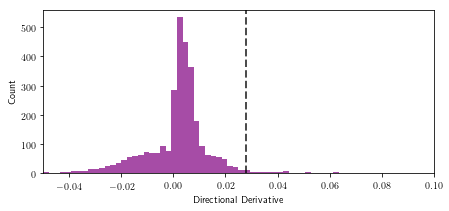

In [963]:
xmin,xmax = -.05,.1


#ymin,ymax = 0,30

fig = plt.figure(figsize=[7,3])

n_bins = 70

#fig, (ax1, ax2) = plt.subplots(2, 1,figsize=[5,3],sharex=True)
_ = plt.hist(-np.array(m_list),alpha=.7,bins=n_bins,range=(xmin,xmax),color='purple',label='Noise')

plt.axvline(x= 0.02778,c='k',linestyle='--',linewidth=2,alpha=.7)
#plt.axvline(x= 0.0,c='k',linestyle='-',linewidth=2,alpha=.7)
my_xlim = plt.xlim([xmin,xmax ])

plt.ylabel('Count')
plt.xlabel('Directional Derivative')
#plt.legend(loc='lower right',framealpha=.9)

plt.savefig('new_figs/tmp.png',dpi=300,bbox_inches='tight')



In [964]:
len(m_list)

3000

In [944]:
xx = np.array(m_list)

In [1018]:
xx.mean()- 3 * xx.std()

-0.040969699080074445

In [521]:
#m_zebra_striped = m_class

In [1017]:
np.where(m_zebra_dotted < -.028)[0].shape[0] / 150

0.3333333333333333

In [523]:
from matplotlib import rc
rc('text', usetex=True) 

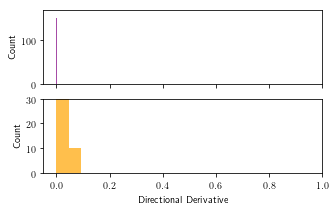

In [524]:
xmin,xmax = .82,.92
xmin,xmax = 1,.05
xmin,xmax = -.05,1


ymin,ymax = 0,30

n_bins = 22

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=[5,3],sharex=True)
ax1.hist(-m_noise,alpha=.7,bins=220,range=(xmin,xmax),color='purple',label='Noise')
#ax1.hist(-m_zebra_dotted,alpha=.7,bins=350,range=(xmin,xmax),color='#b3b8fb',label='Zebra')
#ax1.hist(-m_zebra_dotted,alpha=.7,bins=n_bins,range=(xmin,xmax),color='#b3b8fb',label='Zebra')

#ax1.axvline(x=0.05,c='k',linestyle='--',linewidth=2,alpha=.7)

ax2.hist(-m_class,alpha=.7,bins=n_bins,range=(xmin,xmax),color='orange',label='Zebra')
#ax2.axvline(x=0.05,c='k',linestyle='--',linewidth=2,alpha=.7)


ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,170])

ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymin,ymax])

#ax1.legend(loc='upper left')
#ax2.legend(loc='upper left')
ax2.set_xlabel('Directional Derivative')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

plt.savefig('new_figs/tmp.png',dpi=300,bbox_inches='tight')


In [618]:
#m_zebra

In [579]:
my_list = get_image_list_for_concept('cab','mixed0')

In [580]:
for a,b in zip(my_list,m_class):
    if b < -.5:
        print(a,b)

In [30]:
from sklearn.decomposition import PCA

In [32]:
#x_train_p, x_train_n

In [113]:
this_pca = PCA(n_components=2)

In [114]:
train = np.concatenate((x_train_p,x_train_n))

In [115]:
train.shape

(670, 131072)

In [116]:
this_pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
mu_p = (x_train_p).mean(axis=0)
mu_n = (x_train_n).mean(axis=0)
mu_n_med = np.median(x_train_n,axis=0)


In [118]:
x_p = this_pca.transform(x_train_p)
x_n = this_pca.transform(x_train_n)
x_mu_p = this_pca.transform(np.expand_dims(mu_p,axis=0))
x_mu_n = this_pca.transform(np.expand_dims(mu_n,axis=0))
x_mu_n_med = this_pca.transform(np.expand_dims(mu_n_med,axis=0))

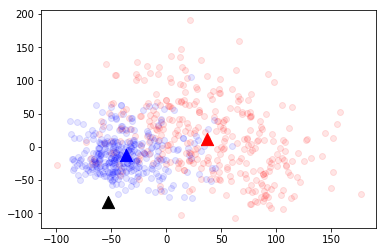

In [119]:
plt.scatter(x_p.T[0],x_p.T[1],color='red',alpha=.1)
plt.scatter(x_n.T[0],x_n.T[1],color='blue',alpha=.1)
plt.scatter(x_mu_p.T[0],x_mu_p.T[1],color='r',marker='^',s=150)
plt.scatter(x_mu_n.T[0],x_mu_n.T[1],color='b',marker='^',s=150)
plt.scatter(x_mu_n_med.T[0],x_mu_n_med.T[1],color='k',marker='^',s=150)

In [451]:
columns = ['target_class','layer','concept_p','concept_n','split_seed','marg_score','mean_score','log_score']
df = pd.DataFrame(columns = columns)
#pickle.dump(df,open('df_5x2_500.pkl', 'wb'))

In [476]:
## CAV loop
source_dir = working_dir + '/concepts/'

target_class = 'lots_of_lions'
target_class_name = 'lion'

class_1_list = ['grassland_sub_1']

hparams = tf.contrib.training.HParams(model_type='linear', alpha=.1)

bn_names = ['mixed0','mixed1','mixed2','mixed3','mixed4','mixed5','mixed6','mixed7','mixed8','mixed9']#,'mixed10']
bn_names = ['mixed0','mixed9','mixed6']
bn_names = ['mixed6','mixed9']
bn_names = ['mixed8']

things_to_run = []
# target_class, target_class_name, concept_p, layer

#things_to_run.append(['zebra_50','zebra','striped_sub_1','mixed0'])
#things_to_run.append(['zebra_50','zebra','dotted_sub_1','mixed0'])

#things_to_run.append(['zebra_50','zebra','striped_sub_1','mixed6'])
#things_to_run.append(['zebra_50','zebra','dotted_sub_1','mixed6'])

#things_to_run.append(['lion_50','lion','grassland_sub_1','mixed6'])
#things_to_run.append(['lion_50','lion','ocean_sub_1','mixed6'])

#things_to_run.append(['lion_50','lion','grassland_sub_1','mixed9'])
#things_to_run.append(['lion_50','lion','ocean_sub_1','mixed9'])

#things_to_run.append(['cab_50','cab','yellow_sub_1','mixed6'])
#things_to_run.append(['cab_50','cab','blue_sub_1','mixed6'])

#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','ocean_sub_1','mixed10'])
#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','grassland_sub_1','mixed10'])

#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','ocean_sub_1','mixed8'])
#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','grassland_sub_1','mixed8'])

#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','ocean_sub_1','mixed9'])
#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','grassland_sub_1','mixed9'])

#things_to_run.append(['ping_pong_ball','ping-pong_ball','ball_sub_1','mixed6'])
#things_to_run.append(['aircraft_carrier_50','aircraft_carrier','grassland_sub_1','mixed9'])

things_to_run.append(['crossword','crossword_puzzle','grid_sub_1','mixed10'])
things_to_run.append(['crossword','crossword_puzzle','dotted_sub_1','mixed10'])

things_to_run.append(['lots_of_zebras','zebra','striped_sub_2','mixed10'])
things_to_run.append(['lots_of_zebras','zebra','dotted_sub_2','mixed10'])

things_to_run.append(['crossword','crossword_puzzle','grid_sub_2','mixed10'])
things_to_run.append(['crossword','crossword_puzzle','dotted_sub_2','mixed10'])

num_random = 5d

split_seed_list = [1,2,3,4,5]

for target_class, target_class_name, concept_p, layer in things_to_run:
    df = pickle.load(open('df_5x2_500.pkl', 'rb'))
    for class_idx in range(num_random):
        for split_seed in split_seed_list:
        #split_seed = class_idx
            #concept_n = 'random500_' + str(class_idx)
            concept_n = 'N_' + str(class_idx)
            subset = df[(df['target_class']==target_class) & 
                    (df['layer']==layer) & 
                    (df['concept_p']==concept_p) &
                    (df['concept_n']==concept_n) &
                    (df['split_seed']==split_seed)]
            if len(subset) == 0:
                print(f'running {target_class}, {layer}, {concept_p}, {concept_n}')

                acts_p,_ = get_acts_for_concept(concept_p,layer)
                acts_n,_ = get_acts_for_concept(concept_n,layer)
                _,acts_class = get_acts_for_concept(target_class,layer)

                x = np.concatenate((acts_p,acts_n))
                y = np.concatenate((np.zeros(50),np.ones(500)))
                #y = np.concatenate((np.zeros(50),np.ones(50)))

                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=split_seed)

                #cav_1 = make_orig_cav(x_train,y_train)
                #score_1 = comp_tcav(target_class_name,cav_1,acts_class,layer)

                #cav_2_seeds = np.empty((100,size_dict[layer]))
                #for seed in range(100):
                #    cav_2_seeds[seed] = make_orig_cav_seed(x_train,y_train,seed)
                #cav_2 = cav_2_seeds.mean(axis=0)
                #marg_score = comp_tcav(target_class_name,cav_2,acts_class,layer)

                x_train_p_list,x_train_n_list =[],[]
                for idx,a in enumerate(x_train):
                    if y_train[idx] == 1:
                        x_train_p_list.append(a)
                    else:
                        x_train_n_list.append(a)

                x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)

                mu_p = (x_train_p).mean(axis=0)
                mu_n = (x_train_n).mean(axis=0)
                cav_params = mu_n - mu_p
                mean_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                cav_params = make_log_cav(x_train,y_train)
                log_score = comp_tcav(target_class_name,cav_params,acts_class,layer)

                this_dict = {'target_class':target_class,
                             'layer':layer,
                             'split_seed':split_seed,
                             'concept_p':concept_p,
                             'concept_n':concept_n,
                             #'marg_score':marg_score,
                             'mean_score':mean_score,
                             'log_score':log_score}
                df = df.append([this_dict])
            else:
                print(f'already in df {target_class}, {layer}, {concept_p}, {concept_n}')

    pickle.dump(df,open('df_5x2_500.pkl', 'wb'))
    print('### did write ###')
pickle.dump(things_to_run,open('to_run_5x2.pkl','wb'))


already in df crossword, mixed10, grid_sub_1, N_0
already in df crossword, mixed10, grid_sub_1, N_0
already in df crossword, mixed10, grid_sub_1, N_0
already in df crossword, mixed10, grid_sub_1, N_0
already in df crossword, mixed10, grid_sub_1, N_0
already in df crossword, mixed10, grid_sub_1, N_1
already in df crossword, mixed10, grid_sub_1, N_1
already in df crossword, mixed10, grid_sub_1, N_1
already in df crossword, mixed10, grid_sub_1, N_1
already in df crossword, mixed10, grid_sub_1, N_1
already in df crossword, mixed10, grid_sub_1, N_2
already in df crossword, mixed10, grid_sub_1, N_2
already in df crossword, mixed10, grid_sub_1, N_2
already in df crossword, mixed10, grid_sub_1, N_2
already in df crossword, mixed10, grid_sub_1, N_2
already in df crossword, mixed10, grid_sub_1, N_3
already in df crossword, mixed10, grid_sub_1, N_3
already in df crossword, mixed10, grid_sub_1, N_3
already in df crossword, mixed10, grid_sub_1, N_3
already in df crossword, mixed10, grid_sub_1, N_3


In [5]:
from sklearn.svm import SVC

In [16]:
def make_orig_cav(x_train,y_train):
    lm = linear_model.SGDClassifier(alpha=.1,max_iter=1000)
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav

def make_log_cav(x_train,y_train):
    lm = linear_model.LogisticRegression()
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav

def make_orig_cav_seed(x_train,y_train,seed):
    lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav

def make_SVM_cav(x_train,y_train,C):
    lm = SVC(kernel = 'linear',random_state=3,C=C)
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav

In [7]:
def comp_tcav(target_class,this_cav,class_acts,bottleneck_name):
    count = 0
    class_id = mymodel.label_to_id(target_class)

    for i in range(len(class_acts)):
        act_at_idx = np.expand_dims(class_acts[i], 0)
        if get_dir(act_at_idx,class_id,this_cav,bottleneck_name):
            count += 1
    score = float(count) / float(len(class_acts))
    return score

def get_dir(acts, class_id, this_cav, bottleneck_name):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod < 0

def comp_tcav_lamb(target_class,this_cav,class_acts,bottleneck_name,lamb):
    count = 0
    class_id = mymodel.label_to_id(target_class)

    for i in range(len(class_acts)):
        act_at_idx = np.expand_dims(class_acts[i], 0)
        if get_dir_lamb(act_at_idx,class_id,this_cav,bottleneck_name,lamb):
            count += 1
    score = float(count) / float(len(class_acts))
    return score

def get_dir_lamb(acts, class_id, this_cav, bottleneck_name,lamb):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod < lamb

In [8]:
def files_from_dir_ext(a_dir,ext):
    onlyfiles = [f for f in os.listdir(a_dir) if os.path.isfile(os.path.join(a_dir, f))]
    this_ext = [e for e in onlyfiles if ext in e.lower()]
    return this_ext

In [9]:
from sklearn import linear_model

def make_orig_cav_seed(x_train,y_train,seed):
    lm = linear_model.SGDClassifier(alpha=.1,random_state=seed)
    lm.fit(x_train, y_train)
    this_cav = -lm.coef_[0]
    return this_cav
def get_magnitude_and_grad(acts, class_id, this_cav, bottleneck_name):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod,grad


def get_magnitude_list(target_class,this_cav,class_acts,bottleneck_name):
    class_id = mymodel.label_to_id(target_class)
    magnitude_list = []
    for i in range(len(class_acts)):
        act_at_idx = np.expand_dims(class_acts[i], 0)
        this_mag = get_magnitude(act_at_idx,class_id,this_cav,bottleneck_name)
        magnitude_list.append(this_mag)
    return np.array(magnitude_list)

def get_magnitude(acts, class_id, this_cav, bottleneck_name):
    grads = sess.run(mymodel.bottlenecks_gradients[bottleneck_name], 
                 {mymodel.bottlenecks_tensors[bottleneck_name]: acts,
                 mymodel.y_input: [class_id]})
                     
    grad = np.reshape(grads, -1)
    dot_prod = np.dot(grad, this_cav)

    return dot_prod

In [10]:
def get_L1(act_for_L1):
    return np.linalg.norm(act_for_L1.T,1,axis = 1) / act_for_L1.shape[1]

def make_L1_cav(x_train,y_train):
    x_train_p_list,x_train_n_list =[],[]
    for idx,a in enumerate(x_train):
        if y_train[idx] == 0:
            x_train_p_list.append(a)
        else:
            x_train_n_list.append(a)

    x_train_p, x_train_n = np.array(x_train_p_list),np.array(x_train_n_list)
    L1_cav = get_L1(x_train_p) - get_L1(x_train_n)
    return L1_cav

In [11]:
def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)
    
def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    #if K.image_data_format() == 'channels_first':
    #    x = x.reshape((3, x.shape[2], x.shape[3]))
    #    x = x.transpose((1, 2, 0))
    #else:
    x = x.reshape((x.shape[0], x.shape[1], 3))
    #x /= 2.
    #x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def get_prediction(img):
    img = preprocess_input(img)
    preds = sess.run(endpoints_v3['prediction'], {endpoints_v3['input']: img})
    top = decode_predictions(preds, top=3)
    return top

preprocess_input

## define functions
def vector_norm(vec):
    norm_const = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
    return vec / norm_const

def vec_norm(vec):
    return  vec / np.linalg.norm(vec)

## CAV distance
def euclidean_distance(a,b):
    return np.linalg.norm(a-b)

def prep2(filename):
    shape=(299, 299)
    img = np.array(PIL.Image.open(open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
    # Normalize pixel values to between 0 and 1.
    img = np.float32(img) / 255.0
    if not (len(img.shape) == 3 and img.shape[2] == 3):
        return None
    else:
        return np.expand_dims(img,axis=0)
# cosine similarity
def cosine_similarity(v1,v2):
    # compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy / math.sqrt(sumxx*sumyy)

In [12]:

def prep2(filename):
    shape=(299, 299)
    img = np.array(PIL.Image.open(open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
    # Normalize pixel values to between 0 and 1.
    img = np.float32(img) / 255.0
    if not (len(img.shape) == 3 and img.shape[2] == 3):
        return None
    else:
        return img

this_img = np.expand_dims(prep2('concepts/random500_0/ILSVRC2012_val_00001172.JPEG'),axis=0)
    
    
    
def get_acts_for_concept(concept,layer):
    concept_dir = os.path.join(working_dir,'concepts/'+concept)
    image_list = files_from_dir_ext(concept_dir,'jp')
    image_list.sort()

    act_path = os.path.join(working_dir,'final_acts/' + concept + '-' + layer + '.pkl')

    n = size_dict[layer]
    nn = size_dict_orig[layer]

    try:
        this_dict = pickle.load(open(act_path, 'rb'))
    except:
        this_dict = {}
        
    #print(nn)
    
    acts_ran = np.zeros((len(image_list),n))
    orig = np.zeros((len(image_list),nn[1],nn[2],nn[3]))
    
    for idx,image_path in enumerate(image_list):
        if image_path not in this_dict:
            img = prep2(os.path.join(concept_dir,image_path))
            this_img = np.expand_dims(img, axis=0)
            acts_orig = get_acts_for_layer_new(layer,this_img)
            acts_ran[idx] = acts_orig.reshape(-1)
            orig[idx] = acts_orig
            this_dict[image_path] = (acts_orig.reshape(-1),acts_orig)
        else:
            acts_ran[idx],orig[idx] = this_dict[image_path]
            #print('acts already exist')

    pickle.dump(this_dict,open(act_path, 'wb'))
    
    return acts_ran,orig

def get_image_list_for_concept(concept,layer):
    concept_dir = os.path.join(working_dir,'concepts/'+concept)
    image_list = files_from_dir_ext(concept_dir,'jp')
    image_list.sort()

    act_path = os.path.join(working_dir,'final_acts/' + concept + '-' + layer + '.pkl')

    n = size_dict[layer]
    nn = size_dict_orig[layer]

    return image_list

def files_from_dir_ext(a_dir,ext):
    onlyfiles = [f for f in os.listdir(a_dir) if os.path.isfile(os.path.join(a_dir, f))]
    this_ext = [e for e in onlyfiles if ext in e.lower()]
    return this_ext
layer_dict = dict([(layer.name, layer) for layer in model.layers])
sess = K.get_session()


acts_mixed0_f = K.function([model.input],[layer_dict['mixed0'].output])
acts_mixed1_f = K.function([model.input],[layer_dict['mixed1'].output])
acts_mixed2_f = K.function([model.input],[layer_dict['mixed2'].output])
acts_mixed3_f = K.function([model.input],[layer_dict['mixed3'].output])
acts_mixed4_f = K.function([model.input],[layer_dict['mixed4'].output])
acts_mixed5_f = K.function([model.input],[layer_dict['mixed5'].output])
acts_mixed6_f = K.function([model.input],[layer_dict['mixed6'].output])
acts_mixed7_f = K.function([model.input],[layer_dict['mixed7'].output])
acts_mixed8_f = K.function([model.input],[layer_dict['mixed8'].output])
acts_mixed9_f = K.function([model.input],[layer_dict['mixed9'].output])
acts_mixed10_f = K.function([model.input],[layer_dict['mixed10'].output])

def get_acts_for_layer_new(layer_name,input_img):
    acts = None
    if layer_name=='mixed0':
        acts = acts_mixed0_f([input_img])[0]
    if layer_name=='mixed1':
        acts = acts_mixed1_f([input_img])[0]
    if layer_name=='mixed2':
        acts = acts_mixed2_f([input_img])[0]
    if layer_name=='mixed3':
        acts = acts_mixed3_f([input_img])[0]
    if layer_name=='mixed4':
        acts = acts_mixed4_f([input_img])[0]
    if layer_name=='mixed5':
        acts = acts_mixed5_f([input_img])[0]
    if layer_name=='mixed6':
        acts = acts_mixed6_f([input_img])[0]
    if layer_name=='mixed7':
        acts = acts_mixed7_f([input_img])[0]
    if layer_name=='mixed8':
        acts = acts_mixed8_f([input_img])[0]
    if layer_name=='mixed9':
        acts = acts_mixed9_f([input_img])[0]
    if layer_name=='mixed10':
        acts = acts_mixed10_f([input_img])[0]
    
    return acts


bn_names = ['mixed0','mixed1','mixed2','mixed3','mixed4','mixed5','mixed6','mixed7','mixed8','mixed9','mixed10']

size_dict = {}
for bn in bn_names:
    acts_orig = get_acts_for_layer_new(bn,this_img)
    size_dict[bn] = acts_orig.reshape(-1).shape[0]
    
size_dict_orig = {}
for bn in bn_names:
    acts_orig = get_acts_for_layer_new(bn,this_img)
    size_dict_orig[bn] = acts_orig.shape